$F_{loss}$ - относительные потери заряженных продуктов 
$P_{fus}$ -полная термоядерная мощность
$P_n$ - мощность в нейтронах ($0.8 P_{fus}$)
$P_{aux}$ - мощность тепловых потерь
$P_{rad}$ - мощность радиационных потерь (Учитывается только тормозное излучение)

$$
(1- f_{lost})(P_{fus} - P_{n}) + P_{aux} - P_{rad} - \frac{W_{th}V}{\Tau_{E}} = 0
$$  

$$
P_{fus} = n_Dn_T\langle \sigma v \rangle E_{fus}V
$$

$$
\langle \sigma v \rangle \approx  1.1 * 10^{-24} T_i^2
$$

$$
W_{th} = \frac{3}{2}nT
$$

In [347]:
import matplotlib.pyplot as plt
import scipy.integrate as si
import numpy as np
from tqdm import tqdm

In [348]:
F_loss = 0.0 
k = 1.380649e-23
P_aux = 1e20
e_Z = 1.6021766208e-19
V_const = 1e6
C_br = 1.34e-36
S_gaz = 0.01
E_vz = 3.27*1.60217733e-13
M = 20
N_a = 6e23



In [349]:
def Cial_Velocity(gas_vel, Start_mass, End_mass):
    return gas_vel*np.log(Start_mass/End_mass)

def Thermal_Energy(n,T):
    return 1.5*n*T*k

def Velocity(Tau, n,T):
    V = V_const
    W_th = Thermal_Energy( n,T)
    Sigma = T/(4*n*e_Z)
    Z_eff__2 = e_Z**2
    T_e = T*8.61732814974056E-04
    P_rad = 8.5*C_br*Z_eff__2*n**2*np.sqrt(T_e/511)*V
    #print(n,T)
    #print(W_th, Sigma, Z_eff__2, T_e, P_rad)
    return (W_th/ (0.2*Sigma*(1-F_loss)*Tau*E_vz) - (P_aux - P_rad)/(0.2*V*Sigma*n*E_vz*(1-F_loss)))

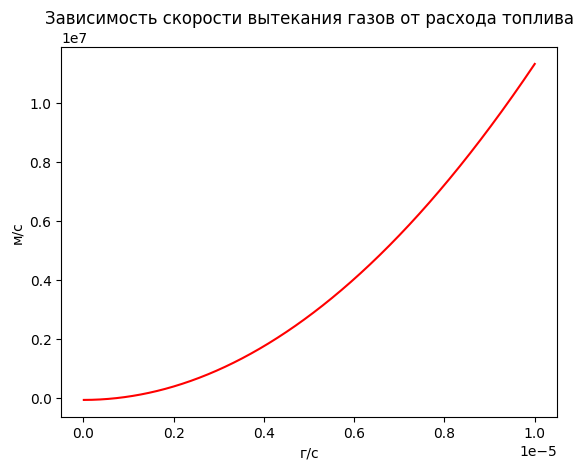

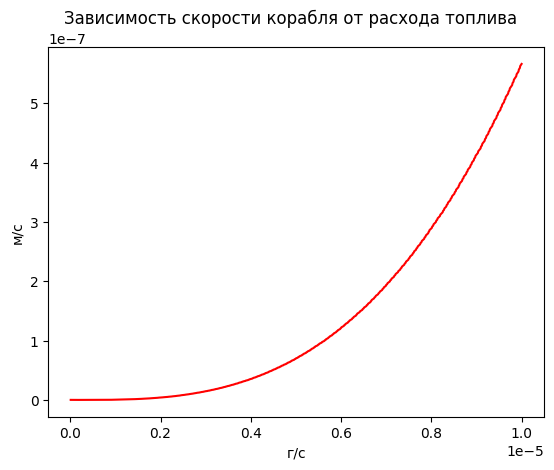

In [350]:
m_ = np.linspace(1e-8,1e-5, 1000)
My_vel = Velocity(1, (m_/M)*N_a, 1e4 )
plt.plot(m_, My_vel, label='Output velocity by gaz mass in', color='red')
plt.title("Зависимость скорости вытекания газов от расхода топлива")
plt.xlabel("г/с")
plt.ylabel("м/с")
plt.show()

Ship_Vel = Cial_Velocity(My_vel, (m_)/1000+2e5, 2e5 )
plt.plot(m_, Ship_Vel, label='-', color='red')
plt.title("Зависимость скорости корабля от расхода топлива  ")
plt.xlabel("г/с")
plt.ylabel("м/с")
plt.show()

In [351]:
Cial_Velocity(10e6, 2e5, 2e5 - 1e3)

50125.41823544193